In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import statsmodels.api as sm
import networkx as nx

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

<h1> $$ Question\space  1.1$$

In [2]:
gwas_data = pd.read_csv('gwas_ped.txt',delimiter='\t')

In [3]:
gwas_data

,phenotype,gender,rs150998363,rs7653678,rs554401939,rs567510858,rs566326361,rs79097847,rs569402044,rs114092330,...,rs115328491,rs1866496,rs535451023,rs10883317,rs185730556,rs61999433,rs13249338,rs562345108,rs139853963,rs769394352
0,0.884662,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,3.336581,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,4.005451,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,7.742034,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,1
4,0.648661,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.706198,2,0,1,0,1,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
4996,3.820314,2,0,1,0,1,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0
4997,0.449075,2,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
4998,2.241252,2,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0


In [4]:
#snp = gwas_data.drop(['phenotype','gender'],1)

In [5]:
#phenotype_data = [] 

#for i in range(len(gwas_data)):
#    phenotype_data.append(gwas_data['phenotype'][i])

In [6]:
#snp #Dataset containing only SNPS

In [7]:
#Performing linear regression on all of the snps

X = gwas_data.drop(['phenotype','gender'],1)

y = gwas_data['phenotype']
        
x_const = sm.add_constant(X)

gwas_regression_model = sm.OLS(y, x_const)  # make the model
gwas_regression_results = gwas_regression_model.fit() # run the OLS fit

In [8]:
gwas_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              phenotype   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.325
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.40e-09
Time:                        15:13:02   Log-Likelihood:                -10131.
No. Observations:                5000   AIC:                         2.226e+04
Df Residuals:                    3999   BIC:                         2.879e+04
Df Model:                        1000                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4476      0.435      5.628      0.000       1.595       3.300
rs150998363     0.0227      0.072      0.316      0.752      -0.118       0.163
rs7653678      -0.0145      0.073     -0.198      0.843      -0.158       0.129
rs554401939     0.0673      0.073      0.924      0.356      -0.075       0.210
rs567510858    -0.0063      0.078     -0.081      0.936      -0.159       0.147
rs566326361    -0.1711      0.079     -2.157      0.031      -0.327      -0.016
rs79097847     -0.0701      0.073     -0.964      0.335      -0.213       0.073
rs569402044    -0.0450      0.080     -0.562      0.574      -0.202       0.112
rs114092330     0.0396      0.072      0.550      0.582      -0.102       0.181
rs181275986    -0.0461      0.083     -0.558      0.577      -0.208       0.116
rs61451569      0.1337      0.082      1.635      0.102      -0.027       0.294
rs13163781     -0.0494      0.074     -0.670      0.503      -0.194       0.095
rs78466564     -0.0255      0.074     -0.345      0.730      -0.170       0.119
rs28525341      0.0200      0.082      0.243      0.808      -0.141       0.181
rs116642432    -0.1129      0.077     -1.475      0.140      -0.263       0.037
rs77668739     -0.0785      0.088     -0.895      0.371      -0.250       0.093
rs77050161      0.0771      0.077      0.997      0.319      -0.074       0.229
rs75351349     -0.0825      0.075     -1.104      0.269      -0.229       0.064
rs145619888    -0.0402      0.078     -0.517      0.605      -0.193       0.112
rs55653293     -0.1069      0.080     -1.342      0.180      -0.263       0.049
rs191862892     0.0082      0.071      0.116      0.908      -0.131       0.147
rs6954763       0.0600      0.078      0.765      0.445      -0.094       0.214
rs9348936      -0.0598      0.071     -0.845      0.398      -0.199       0.079
rs201545346     0.0533      0.072      0.743      0.457      -0.087       0.194
rs767774037    -0.0989      0.078     -1.274      0.203      -0.251       0.053
rs148504074     0.0565      0.078      0.728      0.467      -0.096       0.209
rs751816264     0.1018      0.075      1.352      0.176      -0.046       0.249
rs71368067      0.0023      0.075      0.031      0.975      -0.144       0.149
rs184111794    -0.1195      0.075     -1.589      0.112      -0.267       0.028
rs756032509    -0.0635      0.079     -0.806      0.420      -0.218       0.091
rs10454487     -0.0310      0.082     -0.376      0.707      -0.193       0.131
rs530203098     0.0110      0.079      0.139      0.889      -0.144       0.166
rs17249662      0.0018      0.079      0.023      0.982      -0.153       0.156
rs151175685    -0.0237      0.075     -0.316      0.752      -0.170       0.123
rs575098522    -0.1633      0.088     -1.849      0.065      -0.336       0.010
rs76193711     -0.0226      0.081     -0.27

In [9]:
#Creating a list containing all of the observed pvalues in the linear regression models of each snp

pvals = []

for i in gwas_regression_results.pvalues:
    pvals.append(i)

pvals = np.array(pvals)

In [10]:
o_t = -np.log10(pvals) #Observed Transformation

In [11]:
expected_pvalues = np.arange(1,pvals.shape[0]+1)/pvals.shape[0]  #Creating expected values

In [12]:
e_t = -np.log10(expected_pvalues) #Expected Transformation

In [13]:
sorted_o_t = np.sort(o_t)
sorted_e_t = np.sort(e_t)

Text(0.5, 1.0, 'Q-Q Plot')

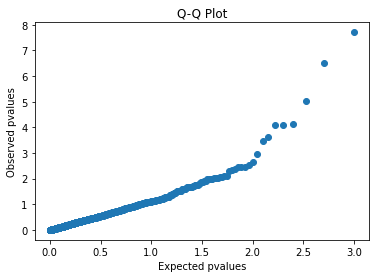

In [14]:
plt.scatter(sorted_e_t,sorted_o_t)
plt.xlabel('Expected pvalues')
plt.ylabel('Observed pvalues')
plt.title('Q-Q Plot')
#As expected pvalue increases, so does the observed pvalue

<h1> $$ Question\space  1.2$$

In [15]:
X = gwas_data.drop(['phenotype'],1)

y = gwas_data['phenotype']
        
x_const = sm.add_constant(X)

gwas_regression_model_2 = sm.OLS(y, x_const)  # make the model
gwas_regression_results_2 = gwas_regression_model_2.fit() # run the OLS fit

In [16]:
gwas_regression_results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              phenotype   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.348
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.56e-10
Time:                        15:13:03   Log-Likelihood:                -10120.
No. Observations:                5000   AIC:                         2.224e+04
Df Residuals:                    3998   BIC:                         2.877e+04
Df Model:                        1001                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6569      0.437      6.085      0.000       1.801       3.513
gender         -0.5002      0.116     -4.314      0.000      -0.727      -0.273
rs150998363     0.0306      0.072      0.427      0.669      -0.110       0.171
rs7653678      -0.0180      0.073     -0.246      0.806      -0.161       0.125
rs554401939     0.0584      0.073      0.803      0.422      -0.084       0.201
rs567510858    -0.0034      0.078     -0.043      0.966      -0.156       0.149
rs566326361    -0.1838      0.079     -2.321      0.020      -0.339      -0.029
rs79097847     -0.0579      0.073     -0.797      0.426      -0.200       0.085
rs569402044    -0.0495      0.080     -0.620      0.536      -0.206       0.107
rs114092330     0.0425      0.072      0.592      0.554      -0.098       0.183
rs181275986    -0.0311      0.082     -0.377      0.706      -0.193       0.131
rs61451569      0.1326      0.082      1.624      0.104      -0.027       0.293
rs13163781     -0.0575      0.074     -0.781      0.435      -0.202       0.087
rs78466564     -0.0138      0.074     -0.187      0.851      -0.158       0.131
rs28525341      0.0363      0.082      0.441      0.659      -0.125       0.198
rs116642432    -0.1025      0.076     -1.342      0.180      -0.252       0.047
rs77668739     -0.0663      0.088     -0.757      0.449      -0.238       0.105
rs77050161      0.0806      0.077      1.045      0.296      -0.071       0.232
rs75351349     -0.0837      0.075     -1.124      0.261      -0.230       0.062
rs145619888    -0.0460      0.078     -0.592      0.554      -0.198       0.106
rs55653293     -0.0959      0.080     -1.206      0.228      -0.252       0.060
rs191862892     0.0064      0.071      0.090      0.928      -0.132       0.145
rs6954763       0.0763      0.078      0.974      0.330      -0.077       0.230
rs9348936      -0.0578      0.071     -0.818      0.413      -0.196       0.081
rs201545346     0.0561      0.072      0.784      0.433      -0.084       0.196
rs767774037    -0.0982      0.077     -1.268      0.205      -0.250       0.054
rs148504074     0.0660      0.078      0.852      0.394      -0.086       0.218
rs751816264     0.1072      0.075      1.426      0.154      -0.040       0.255
rs71368067      0.0020      0.075      0.026      0.979      -0.144       0.148
rs184111794    -0.1141      0.075     -1.520      0.129      -0.261       0.033
rs756032509    -0.0663      0.079     -0.843      0.399      -0.220       0.088
rs10454487     -0.0246      0.082     -0.300      0.765      -0.186       0.137
rs530203098     0.0124      0.079      0.157      0.875      -0.142       0.167
rs17249662      0.0009      0.079      0.011      0.991      -0.153       0.155
rs151175685    -0.0218      0.075     -0.292      0.771      -0.168       0.125
rs575098522    -0.1502      0.088     -1.70

In [17]:
pvals_2 = []

for i in gwas_regression_results_2.pvalues:
    pvals_2.append(i)

pvals_2 = np.array(pvals_2)

In [18]:
len(pvals_2)

1002

In [19]:
o_t_2 = -np.log10(pvals_2) #Observed Transformation
expected_pvalues_2 = np.arange(1,pvals_2.shape[0]+1)/pvals_2.shape[0]  #Creating expected values
e_t_2 = -np.log10(expected_pvalues_2) #Expected Transformation

In [20]:
sorted_o_t_2 = np.sort(o_t_2)
sorted_e_t_2 = np.sort(e_t_2)

Text(0, 0.5, 'Observed pvalues')

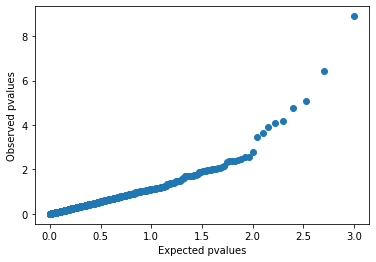

In [21]:
plt.scatter(sorted_e_t_2,sorted_o_t_2)
plt.xlabel('Expected pvalues')
plt.ylabel('Observed pvalues')

#There seems to be no observable difference when adding gender into this as well

<h1> $$ Question\space  1.3$$

In [22]:
individual_snp = gwas_data[gwas_data.columns[2:]].values

In [23]:
pca = PCA(n_components = 2)

In [24]:
pca_coordinates = pca.fit_transform(individual_snp)

In [25]:
PC1 = pca_coordinates[:,0]
PC2 = pca_coordinates[:,1]

In [26]:
pca_coordinates

array([[-2.11177226, -1.36572683],
       [-1.38673928, -1.02276193],
       [-2.38301964, -0.59865188],
       ...,
       [ 1.87787663, -0.48311338],
       [ 1.49692896, -0.25302543],
       [ 2.22048961, -1.35942273]])

<h1> $$ Question\space  1.4$$

In [27]:
gwas_data['PC1'] = PC1
gwas_data['PC2'] = PC2

In [28]:
gwas_data

,phenotype,gender,rs150998363,rs7653678,rs554401939,rs567510858,rs566326361,rs79097847,rs569402044,rs114092330,...,rs535451023,rs10883317,rs185730556,rs61999433,rs13249338,rs562345108,rs139853963,rs769394352,PC1,PC2
0,0.884662,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,-2.111772,-1.365727
1,3.336581,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,-1.386739,-1.022762
2,4.005451,1,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,-2.383020,-0.598652
3,7.742034,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,-2.215412,-0.825300
4,0.648661,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.492316,-0.697172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.706198,2,0,1,0,1,0,1,1,0,...,0,0,1,0,1,1,0,0,2.467000,0.266086
4996,3.820314,2,0,1,0,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1.470390,-0.364364
4997,0.449075,2,0,0,1,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1.877877,-0.483113
4998,2.241252,2,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1.496929,-0.253025


In [29]:
#FOR SOME REASON, WHEN ADDING PC1 INTO THIS REGRESSION MODEL IT FORCES ALL THE PVALUES TO BE THE SAME.

X = gwas_data.drop(['phenotype','PC1'],1)

y = gwas_data['phenotype']
        
x_const = sm.add_constant(X)

gwas_regression_model_3 = sm.OLS(y, x_const)  # make the model
gwas_regression_results_3 = gwas_regression_model_3.fit() # run the OLS fit

In [30]:
gwas_regression_results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              phenotype   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.348
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.56e-10
Time:                        15:13:05   Log-Likelihood:                -10120.
No. Observations:                5000   AIC:                         2.224e+04
Df Residuals:                    3998   BIC:                         2.877e+04
Df Model:                        1001                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6294      0.265      6.157      0.000       1.111       2.148
gender         -0.5002      0.116     -4.314      0.000      -0.727      -0.273
rs150998363    -0.0060      0.072     -0.084      0.933      -0.147       0.135
rs7653678      -0.0174      0.073     -0.239      0.811      -0.161       0.126
rs554401939     0.0921      0.073      1.267      0.205      -0.050       0.235
rs567510858    -0.0205      0.078     -0.263      0.792      -0.173       0.132
rs566326361    -0.1647      0.079     -2.080      0.038      -0.320      -0.009
rs79097847     -0.0518      0.073     -0.713      0.476      -0.194       0.091
rs569402044     0.0080      0.080      0.100      0.920      -0.149       0.165
rs114092330     0.0667      0.072      0.930      0.352      -0.074       0.207
rs181275986    -0.0562      0.083     -0.680      0.496      -0.218       0.106
rs61451569      0.1444      0.082      1.769      0.077      -0.016       0.304
rs13163781     -0.0473      0.073     -0.644      0.520      -0.191       0.097
rs78466564     -0.0190      0.074     -0.258      0.796      -0.164       0.126
rs28525341      0.0379      0.082      0.460      0.645      -0.123       0.199
rs116642432    -0.1311      0.077     -1.709      0.088      -0.282       0.019
rs77668739     -0.0825      0.088     -0.942      0.346      -0.254       0.089
rs77050161      0.0830      0.077      1.076      0.282      -0.068       0.234
rs75351349     -0.0739      0.074     -0.993      0.321      -0.220       0.072
rs145619888    -0.0021      0.078     -0.027      0.979      -0.154       0.150
rs55653293     -0.1186      0.080     -1.491      0.136      -0.274       0.037
rs191862892     0.0206      0.071      0.290      0.772      -0.118       0.159
rs6954763       0.0344      0.079      0.437      0.662      -0.120       0.189
rs9348936      -0.1085      0.071     -1.523      0.128      -0.248       0.031
rs201545346     0.0532      0.072      0.743      0.458      -0.087       0.193
rs767774037    -0.1248      0.078     -1.604      0.109      -0.277       0.028
rs148504074     0.1120      0.078      1.437      0.151      -0.041       0.265
rs751816264     0.1408      0.075      1.870      0.062      -0.007       0.288
rs71368067     -0.0299      0.075     -0.399      0.690      -0.177       0.117
rs184111794    -0.1318      0.075     -1.753      0.080      -0.279       0.016
rs756032509    -0.0742      0.079     -0.943      0.346      -0.228       0.080
rs10454487      0.0132      0.082      0.160      0.873      -0.148       0.175
rs530203098     0.0566      0.079      0.714      0.475      -0.099       0.212
rs17249662     -0.0193      0.079     -0.245      0.806      -0.174       0.135
rs151175685     0.0250      0.075      0.334      0.739      -0.122       0.172
rs575098522    -0.1463      0.088     -1.66

In [31]:
pvals_3 = []

for i in gwas_regression_results_3.pvalues:
    pvals_3.append(i)

pvals_3 = np.array(pvals_3)

In [32]:
pvals_3 = pvals_3[1:1001] #Removing the xconstant variable so data stays at shape 1000 for later use

In [33]:
o_t_3 = -np.log10(pvals_3) #Observed Transformation
expected_pvalues_3 = np.arange(1,pvals_3.shape[0]+1)/pvals_3.shape[0]  #Creating expected values
e_t_3 = -np.log10(expected_pvalues_3) #Expected Transformation

In [34]:
len(o_t_3)
len(pvals_3)

1000

In [35]:
sorted_o_t_3 = np.sort(o_t_3)
sorted_e_t_3 = np.sort(e_t_3)

Text(0, 0.5, 'Observed pvalues')

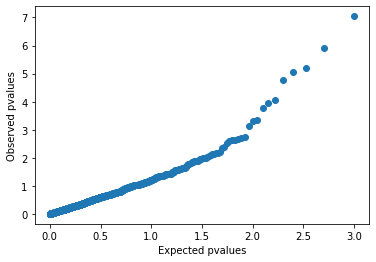

In [36]:
plt.scatter(sorted_e_t_3,sorted_o_t_3)
plt.xlabel('Expected pvalues')
plt.ylabel('Observed pvalues')


<h1> $$ Question\space  1.5$$

In [37]:
snp_map_data = pd.read_csv('snp_map.txt',delimiter='\t')

In [38]:
snp_map_data['pvalues'] = pvals_3

In [39]:
snp_map_data

,rsid,chr,variant_pos,ref,alt,pvalues
0,rs150998363,chr1,40867428,A,G,1.640878e-05
1,rs7653678,chr3,54891720,G,C,9.332166e-01
2,rs554401939,chr8,113304126,T,A,8.112551e-01
3,rs567510858,chr16,77585860,G,A,2.051221e-01
4,rs566326361,chr8,136350322,G,A,7.922165e-01
...,...,...,...,...,...,...
995,rs61999433,chr14,39597204,G,A,1.625107e-01
996,rs13249338,chr8,56847170,A,G,5.206321e-02
997,rs562345108,chr6,143354228,T,C,9.024273e-08
998,rs139853963,chrX,124985805,G,A,2.216536e-03


In [40]:
bonferroni_calc = sm.stats.multipletests(snp_map_data['pvalues'],alpha=0.01,method='bonferroni')

In [41]:
rejected, pvals_corrected, a_sidak, a_bonferroni = bonferroni_calc

In [42]:
snp_map_data['Bonferroni Correction'] =  pvals_corrected.tolist()

In [43]:
snp_map_data

,rsid,chr,variant_pos,ref,alt,pvalues,Bonferroni Correction
0,rs150998363,chr1,40867428,A,G,1.640878e-05,0.016409
1,rs7653678,chr3,54891720,G,C,9.332166e-01,1.000000
2,rs554401939,chr8,113304126,T,A,8.112551e-01,1.000000
3,rs567510858,chr16,77585860,G,A,2.051221e-01,1.000000
4,rs566326361,chr8,136350322,G,A,7.922165e-01,1.000000
...,...,...,...,...,...,...,...
995,rs61999433,chr14,39597204,G,A,1.625107e-01,1.000000
996,rs13249338,chr8,56847170,A,G,5.206321e-02,1.000000
997,rs562345108,chr6,143354228,T,C,9.024273e-08,0.000090
998,rs139853963,chrX,124985805,G,A,2.216536e-03,1.000000


In [44]:
significant_snps = snp_map_data[snp_map_data['Bonferroni Correction']<.05]

In [45]:
significant_snps

,rsid,chr,variant_pos,ref,alt,pvalues,Bonferroni Correction
0,rs150998363,chr1,40867428,A,G,1.640878e-05,0.016409
110,rs76684439,chr14,100660068,A,G,1.204310e-06,0.001204
610,rs376356128,chr11,119406344,C,T,8.679247e-06,0.008679
645,rs145503358,chr2,119999534,C,T,6.517266e-06,0.006517
997,rs562345108,chr6,143354228,T,C,9.024273e-08,0.000090


<h1> $$ Question\space  2.1$$

In [46]:
gene_annotation_data = pd.read_csv('gene_annotation.txt',delimiter='\t')

In [47]:
gene_annotation_data

,gene_id,chr,start,end,strand,gene_name
0,ENSG00000000938,chr1,27938575,27961788,-1,FGR
1,ENSG00000001167,chr6,41040684,41067715,1,NFYA
2,ENSG00000010671,chrX,100604435,100641183,-1,BTK
3,ENSG00000100811,chr14,100704635,100749129,1,YY1
4,ENSG00000136997,chr8,128747680,128753674,1,MYC
5,ENSG00000140105,chr14,100800125,100843142,-1,WARS
6,ENSG00000165025,chr9,93564069,93660831,1,SYK
7,ENSG00000177885,chr17,73314157,73401790,-1,GRB2
8,ENSG00000196405,chr14,100437786,100610573,1,EVL
9,ENSG00000254087,chr8,56792372,56923939,1,LYN


In [48]:
significant_chromosomes = []

for i in significant_snps['chr']:
    significant_chromosomes.append(i)

In [49]:
significant_chromosomes

['chr1', 'chr14', 'chr11', 'chr2', 'chr6']

In [50]:
overlapping_genes = pd.DataFrame()

counter_list = [] #Made so that no duplicates are added in our new dataframe

for i in gene_annotation_data['chr']:
    if i in significant_chromosomes and i not in counter_list:
        overlapping_genes = overlapping_genes.append(gene_annotation_data.loc[gene_annotation_data['chr']==i])
        counter_list.append(i)

In [51]:
overlapping_genes

,gene_id,chr,start,end,strand,gene_name
0,ENSG00000000938,chr1,27938575,27961788,-1,FGR
1,ENSG00000001167,chr6,41040684,41067715,1,NFYA
3,ENSG00000100811,chr14,100704635,100749129,1,YY1
5,ENSG00000140105,chr14,100800125,100843142,-1,WARS
8,ENSG00000196405,chr14,100437786,100610573,1,EVL


<h1> $$ Question\space  2.2$$

In [52]:
significant_snps['pvalues']

0      1.640878e-05
110    1.204310e-06
610    8.679247e-06
645    6.517266e-06
997    9.024273e-08
Name: pvalues, dtype: float64

<h1> $$ Question\space  2.3$$

My best guess for the genes associated with disease would be either MYC or BTK

<h1> $$ Question\space  2.4$$

In [53]:
np.shape(o_t)
np.shape(o_t_2)
np.shape(o_t_3)

(1000,)

In [54]:
len(gwas_regression_results.pvalues)

1001

In [55]:
s = gene_annotation_data.drop(['gene_id','strand','gene_name'],1)
print(s)

     chr      start        end
0   chr1   27938575   27961788
1   chr6   41040684   41067715
2   chrX  100604435  100641183
3  chr14  100704635  100749129
4   chr8  128747680  128753674
5  chr14  100800125  100843142
6   chr9   93564069   93660831
7  chr17   73314157   73401790
8  chr14  100437786  100610573
9   chr8   56792372   56923939


<h1> $$ Question\space  2.5$$

In [56]:
adj_matrix = {'BTK':['LYN','SYK','GRB2','MYC'],
              'SYK':['BTK'],
              'LYN':['BTK'],
              'MYC':['NFYA','FGR','BTK'],
              'FGR':['MYC'],
              'NFYA':['MYC'],
              'GRB2':['BTK']
             }

In [57]:
vertices = []

for i in adj_matrix:
    vertices.append(i)

In [58]:
t = []

for i in vertices:
    print("Degree of",i,"is",len(adj_matrix[i]))
    t.append(len(adj_matrix[i]))

total_nodes = sum(t)

Degree of BTK is 4
Degree of SYK is 1
Degree of LYN is 1
Degree of MYC is 3
Degree of FGR is 1
Degree of NFYA is 1
Degree of GRB2 is 1


In [59]:
total_nodes

12

In [60]:
g = []

for i in vertices:
    g.append((i, len(adj_matrix[i])))
    

In [61]:
centrality = []

for i in vertices:
    c = (len(adj_matrix[i])-1) / (abs(total_nodes)-1)
    centrality.append((i,c))

In [62]:
#BTK IS THE MOST CENTRAL NODE

centrality

[('BTK', 0.2727272727272727),
 ('SYK', 0.0),
 ('LYN', 0.0),
 ('MYC', 0.18181818181818182),
 ('FGR', 0.0),
 ('NFYA', 0.0),
 ('GRB2', 0.0)]

<h1> $$ Question\space  3.1$$

In [63]:
snp_gene_expression_data = pd.read_csv('snp_gene_expression.txt',delimiter='\t')

In [64]:
snp_gene_expression_data

,rs76684439,rs114313658,rs573136085,rs117819087,rs548153193,EVL,YY1,WARS
0,0,0,0,0,0,0.000000,0.000000,0.977315
1,0,0,0,0,0,0.000000,0.000000,3.248377
2,0,0,0,0,0,0.000000,0.000000,0.000000
3,0,0,0,0,0,0.000000,0.984452,0.000000
4,1,0,0,0,0,0.000000,0.949691,0.000000
...,...,...,...,...,...,...,...,...
4995,0,0,1,0,0,1.599516,3.070604,0.000000
4996,0,0,0,0,1,3.838180,0.000000,0.000000
4997,0,0,0,0,0,3.009443,0.000000,0.000000
4998,0,0,1,1,0,0.000000,1.335295,0.968207


In [82]:
X = snp_gene_expression_data.drop(['WARS','YY1','EVL'],1)

y1 = snp_gene_expression_data['WARS']
y2 = snp_gene_expression_data['YY1']
y3 = snp_gene_expression_data['EVL']
        
x_const = sm.add_constant(X)

snp_gene_regression_model_WARS = sm.OLS(y1, x_const)  # make the model
snp_gene_regression_results_WARS = snp_gene_regression_model_WARS.fit() # run the OLS fit

snp_gene_regression_model_YY1 = sm.OLS(y2, x_const)  # make the model
snp_gene_regression_results_YY1 = snp_gene_regression_model_YY1.fit() # run the OLS fit

snp_gene_regression_model_EVL = sm.OLS(y3, x_const)  # make the model
snp_gene_regression_results_EVL = snp_gene_regression_model_EVL.fit() # run the OLS fit

In [77]:
snp_gene_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WARS   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.597
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.157
Time:                        15:14:30   Log-Likelihood:                -8528.6
No. Observations:                5000   AIC:                         1.707e+04
Df Residuals:                    4994   BIC:                         1.711e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0405      0.028     37.173      0.000       0.986       1.095
rs76684439      0.0811      0.045      1.813      0.070      -0.007       0.169
rs114313658     0.0746      0.048      1.542      0.123      -0.020       0.170
rs573136085     0.0095      0.047      0.202      0.840      -0.083       0.102
rs117819087    -0.0648      0.046     -1.406      0.160      -0.155       0.026
rs548153193    -0.0291      0.047     -0.618      0.537      -0.121       0.063
==============================================================================
Omnibus:                     1031.357   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1827.244
Skew:                           1.329   Prob(JB):                         0.00
Kurtosis:                       4.306   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
snp_gene_regression_results_EVL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EVL   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          6.41e-101
Time:                        15:16:30   Log-Likelihood:                -8276.5
No. Observations:                5000   AIC:                         1.657e+04
Df Residuals:                    4994   BIC:                         1.660e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7480      0.027     28.103      0.000       0.696       0.800
rs76684439      0.9459      0.043     22.233      0.000       0.862       1.029
rs114313658     0.0754      0.046      1.637      0.102      -0.015       0.166
rs573136085     0.0729      0.045      1.621      0.105      -0.015       0.161
rs117819087     0.0060      0.044      0.136      0.892      -0.080       0.092
rs548153193    -0.0041      0.045     -0.091      0.927      -0.092       0.084
==============================================================================
Omnibus:                     1020.828   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1844.644
Skew:                           1.291   Prob(JB):                         0.00
Kurtosis:                       4.479   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
snp_gene_regression_results_YY1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    YY1   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     36.92
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           2.81e-37
Time:                        15:16:43   Log-Likelihood:                -8230.5
No. Observations:                5000   AIC:                         1.647e+04
Df Residuals:                    4994   BIC:                         1.651e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8002      0.026     30.344      0.000       0.749       0.852
rs76684439     -0.0235      0.042     -0.558      0.577      -0.106       0.059
rs114313658    -0.0079      0.046     -0.173      0.863      -0.097       0.082
rs573136085     0.4749      0.045     10.660      0.000       0.388       0.562
rs117819087     0.3460      0.043      7.964      0.000       0.261       0.431
rs548153193    -0.0373      0.044     -0.842      0.400      -0.124       0.050
==============================================================================
Omnibus:                     1097.816   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2036.188
Skew:                           1.375   Prob(JB):                         0.00
Kurtosis:                       4.488   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1> $$ Question\space  3.2$$

The mechanisms for some of the non-coding regions could be that they are some sort of inhibitor before things reach the coding regions